**If you like my notebook, please don't forget to upvote! You can also make a copy of my notebook and edit to run your additional analysis.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


In [2]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing the Raw data

In [3]:
raw_data = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')
raw_data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Let's make a copy of the raw data for further processing and run to see if the data is matching.

In [4]:
# copying data

df = raw_data.copy()
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.shape

(374, 13)

The dataframe has 374 rows and 13 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Let's check the descriptive statisticts summary table.

In [7]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Check for missing values:

In [8]:
(df.isnull().sum()/len(df))

Person ID                  0.0
Gender                     0.0
Age                        0.0
Occupation                 0.0
Sleep Duration             0.0
Quality of Sleep           0.0
Physical Activity Level    0.0
Stress Level               0.0
BMI Category               0.0
Blood Pressure             0.0
Heart Rate                 0.0
Daily Steps                0.0
Sleep Disorder             0.0
dtype: float64

There are no missing values in the dataset.

# EDA of Categorical Features

Plotting some countplots for categorical variables.

Target (Sleep Disorder):

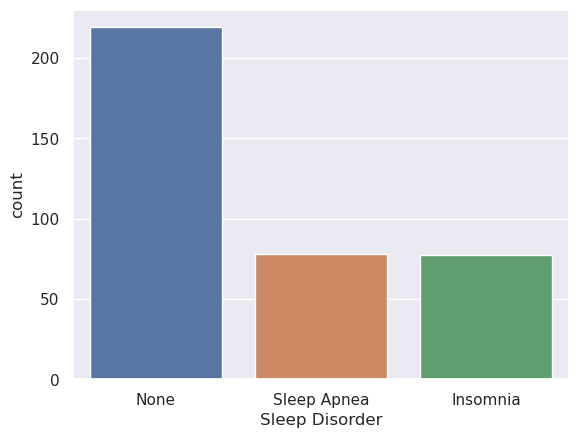

In [9]:
sns.countplot(x='Sleep Disorder', data = df)
plt.show()

The dataset contains slightly more samples with no sleep disorders. However, the number of samples of Sleep Apnea and Insomnia are almost equal. 

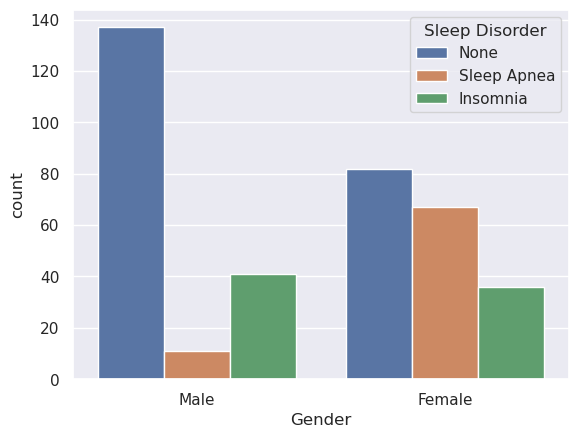

In [10]:
sns.countplot(x='Gender', data = df, hue='Sleep Disorder')
plt.show()

The Gender variable is well balanced. It can be observed that females tend to have higher cases of sleep disorders than males.

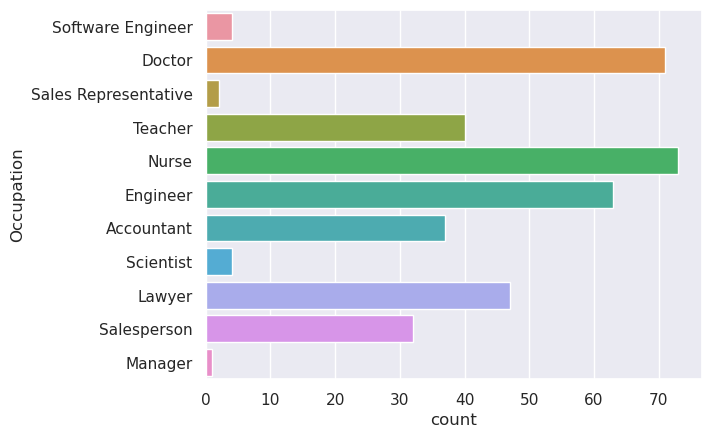

In [11]:
sns.countplot(y='Occupation', data = df)
plt.show()

 It can be observed that few occupations have higher prominance than the other and hence the data imbalanced. Let's combine software engineer, sales rep, scientist and manager, and label them as 'other' to better balance the dataset.

In [12]:
to_combine = ['Software Engineer', 'Sales Representative', 'Scientist', 'Manager']
df['Occupation'] = df['Occupation'].replace(to_combine, 'Other')

In [13]:
df['Occupation'].unique()

array(['Other', 'Doctor', 'Teacher', 'Nurse', 'Engineer', 'Accountant',
       'Lawyer', 'Salesperson'], dtype=object)

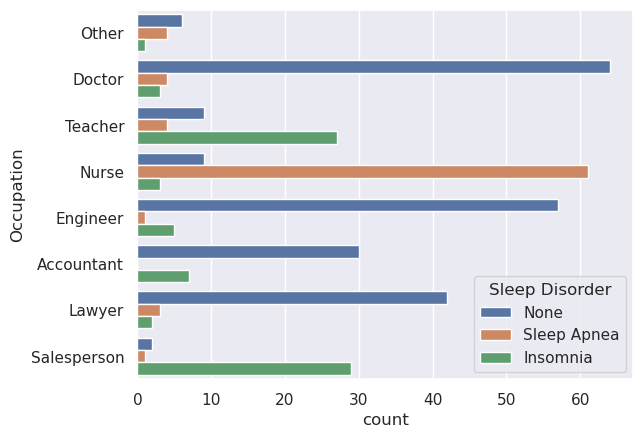

In [14]:
sns.countplot(y='Occupation', data = df, hue = 'Sleep Disorder')
plt.show()

Nurses have the highest sleep apnea whereas teachers and salespersons have highest insomnia.

In [15]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

Let's combine 'Normal' and 'Normal Weight'.

In [16]:
# combining 'normal weight' and 'normal'
to_combine = ['Normal', 'Normal Weight']
df['BMI Category'] = df['BMI Category'].replace(to_combine, 'Normal')

In [17]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

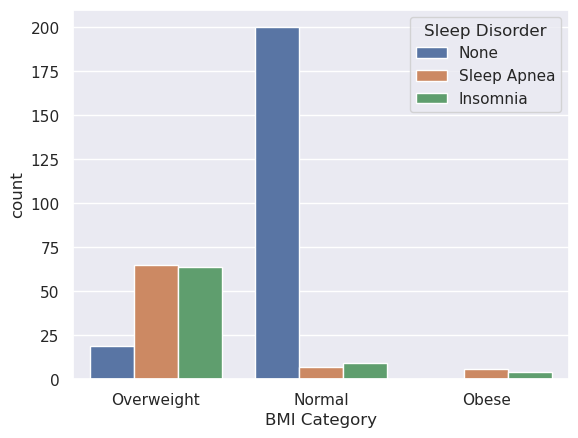

In [18]:
sns.countplot(x='BMI Category', data = df, hue='Sleep Disorder')
plt.show()

All obese people have either sleep apnea or insomnia, most of the overweight people have a sleep disorder, and very few people with normal BMI have sleep disorders.

# Data Preprocessing

Let's start by splitting the 'Blood Pressure' into 'bp_lower' and 'bp_upper'.  

In [19]:
df_bp_split = pd.concat([df, df['Blood Pressure'].str.split('/', expand=True)], axis=1).drop('Blood Pressure', axis=1)
df_bp_split.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,0,1
0,1,Male,27,Other,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [20]:
df_bp_split = df_bp_split.rename(columns={0: 'bp_upper', 1: 'bp_lower'})
df_bp_split.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,bp_upper,bp_lower
0,1,Male,27,Other,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [21]:
df_bp_split['bp_upper'] = df_bp_split['bp_upper'].astype('int')
df_bp_split['bp_lower'] = df_bp_split['bp_lower'].astype('int')

In [22]:
df_bp_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  bp_upper                 374 non-null    int64  
 13  bp_lower                 374 non-null    int64  
dtypes: float64(1), int64(9), o

We can drop 'Person ID' as it does not carry any information.

In [23]:
# dropping person ID
df_bp_split = df_bp_split.drop('Person ID', axis=1)
df_bp_split.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,bp_upper,bp_lower
0,Male,27,Other,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Other,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


As only few categories are present, we can apply one-hot encoding to get dummies.

In [24]:
#one-hot encoding 
dummies = pd.get_dummies(df_bp_split[['Gender', 'Occupation', 'BMI Category']])
df_bp_split = pd.concat([df_bp_split, dummies], axis = 1)

In [25]:
df_bp_split = df_bp_split.drop(['Gender', 'Occupation', 'BMI Category'], axis = 1)

Let's make a copy of the data before scaling and transforming the inputs.

In [26]:
unscaled = df_bp_split.copy()
unscaled.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,bp_upper,bp_lower,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Other,Occupation_Salesperson,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight
0,27,6.1,6,42,6,77,4200,None,126,83,...,0,0,0,0,1,0,0,0,0,1
1,28,6.2,6,60,8,75,10000,None,125,80,...,1,0,0,0,0,0,0,1,0,0
2,28,6.2,6,60,8,75,10000,None,125,80,...,1,0,0,0,0,0,0,1,0,0
3,28,5.9,4,30,8,85,3000,Sleep Apnea,140,90,...,0,0,0,0,1,0,0,0,1,0
4,28,5.9,4,30,8,85,3000,Sleep Apnea,140,90,...,0,0,0,0,1,0,0,0,1,0


In [27]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator, TransformerMixin):

    def __init__(self, columns, copy=True, with_mean=True, with_std=True):
        self.columns = columns
        self.copy = copy
        self.with_mean = with_mean
        self.with_std = with_std

    def fit(self, X, y=None):
        self.scaler = StandardScaler(copy=self.copy, with_mean=self.with_mean, with_std=self.with_std)
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:, ~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis = 1)[init_col_order]


In [28]:
columns_reordered = ['Age', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'Heart Rate',
       'Daily Steps', 'bp_upper', 'bp_lower',
       'Gender_Female', 'Gender_Male', 'Occupation_Accountant',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Nurse', 'Occupation_Other', 'Occupation_Salesperson',
       'Occupation_Teacher', 'BMI Category_Normal', 'BMI Category_Obese',
       'BMI Category_Overweight','Sleep Disorder']

In [29]:
unscaled = unscaled[columns_reordered]
unscaled.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,bp_upper,bp_lower,Gender_Female,...,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Other,Occupation_Salesperson,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder
0,27,6.1,6,42,6,77,4200,126,83,0,...,0,0,0,1,0,0,0,0,1,None
1,28,6.2,6,60,8,75,10000,125,80,0,...,0,0,0,0,0,0,1,0,0,None
2,28,6.2,6,60,8,75,10000,125,80,0,...,0,0,0,0,0,0,1,0,0,None
3,28,5.9,4,30,8,85,3000,140,90,0,...,0,0,0,1,0,0,0,1,0,Sleep Apnea
4,28,5.9,4,30,8,85,3000,140,90,0,...,0,0,0,1,0,0,0,1,0,Sleep Apnea


In [30]:
unscaled_inputs = unscaled.iloc[:,:-1]

In [31]:
columns_to_omit = ['Gender_Female',
       'Gender_Male', 'Occupation_Accountant', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Lawyer', 'Occupation_Nurse',
       'Occupation_Other', 'Occupation_Salesperson', 'Occupation_Teacher',
       'BMI Category_Normal', 'BMI Category_Obese',
       'BMI Category_Overweight']

In [32]:
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [33]:
sleep_scaler = CustomScaler(columns_to_scale)

In [34]:
sleep_scaler.fit(unscaled_inputs)

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


CustomScaler(columns=['Age', 'Sleep Duration', 'Quality of Sleep',
                      'Physical Activity Level', 'Stress Level', 'Heart Rate',
                      'Daily Steps', 'bp_upper', 'bp_lower'])

In [35]:
scaled_inputs = sleep_scaler.transform(unscaled_inputs)

In [36]:
scaled_inputs

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,bp_upper,bp_lower,Gender_Female,...,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Nurse,Occupation_Other,Occupation_Salesperson,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight
0,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584,-0.330002,-0.268102,0,...,0,0,0,0,1,0,0,0,0,1
1,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,0,...,1,0,0,0,0,0,0,1,0,0
2,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,0,...,1,0,0,0,0,0,0,1,0,0
3,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,0,...,0,0,0,0,1,0,0,0,1,0
4,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,1.941401,1.218127,1.411435,0.760896,-1.345836,-0.524383,0.113356,1.479309,1.682049,1,...,0,0,0,1,0,0,0,0,0,1
370,1.941401,1.092276,1.411435,0.760896,-1.345836,-0.524383,0.113356,1.479309,1.682049,1,...,0,0,0,1,0,0,0,0,0,1
371,1.941401,1.218127,1.411435,0.760896,-1.345836,-0.524383,0.113356,1.479309,1.682049,1,...,0,0,0,1,0,0,0,0,0,1
372,1.941401,1.218127,1.411435,0.760896,-1.345836,-0.524383,0.113356,1.479309,1.682049,1,...,0,0,0,1,0,0,0,0,0,1


In [37]:
scaled_inputs.shape

(374, 22)

In [38]:
targets = unscaled['Sleep Disorder']

In [39]:
targets.shape

(374,)

# Splitting the Dataset

In [40]:
from sklearn.model_selection import train_test_split

performing a 80-20 train-test split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, #train_size = 0.8, 
                                                                            test_size = 0.2, random_state = 20)

In [42]:
print (x_train.shape, y_train.shape)

(299, 22) (299,)


In [43]:
print (x_test.shape, y_test.shape)

(75, 22) (75,)


# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
reg = LogisticRegression()

In [47]:
reg.fit(x_train,y_train)

LogisticRegression()

In [48]:
reg.score(x_train,y_train)

0.9230769230769231

We get a training accuracy of 92.3%

In [49]:
 from sklearn.model_selection import cross_val_score
    
scores = cross_val_score(reg, x_train, y_train, cv=13)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.91 accuracy with a standard deviation of 0.06


Finding intercept and coefficient of regression:

In [50]:
reg.intercept_

array([-0.53657107,  1.36131909, -0.82474802])

In [51]:
reg.coef_

array([[ 0.38187427, -0.88190804, -0.35893091,  0.18633912, -0.1496886 ,
        -0.36168693, -0.78908438,  0.67195241,  0.3442498 , -0.30763789,
         0.30747997,  1.05330648, -0.38842322,  0.53752688, -0.12586432,
        -1.1419508 , -1.04399547,  0.77734665,  0.33189588,  0.23257444,
         0.02927655, -0.26200891],
       [-0.17033143, -0.48704888,  0.72338732, -0.00167972,  0.0054025 ,
        -0.41477777,  0.2868578 , -0.8886248 , -0.97269807,  0.18115195,
        -0.18088491, -0.79900964,  0.64021348, -0.11604205,  0.33467623,
         0.48373681,  0.56353207, -0.5763175 , -0.53052238,  0.19483971,
        -0.0689627 , -0.12560998],
       [-0.21154284,  1.36895692, -0.36445642, -0.1846594 ,  0.1442861 ,
         0.7764647 ,  0.50222659,  0.21667239,  0.62844827,  0.12648594,
        -0.12659506, -0.25429684, -0.25179026, -0.42148483, -0.20881191,
         0.65821399,  0.4804634 , -0.20102915,  0.1986265 , -0.42741415,
         0.03968614,  0.38761889]])

Testing model

In [52]:
pred = reg.predict(x_test)

Confusion matrix:

In [53]:
c = confusion_matrix(y_test, pred)
c

array([[14,  2,  0],
       [ 0, 47,  1],
       [ 0,  2,  9]])

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [55]:
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, pred, target_names=['Insomnia', 'None', 'Sleep Apnea']))


Accuracy: 0.9333

Micro Precision: 0.93
Micro Recall: 0.93
Micro F1-score: 0.93

Macro Precision: 0.94
Macro Recall: 0.89
Macro F1-score: 0.91

Weighted Precision: 0.94
Weighted Recall: 0.93
Weighted F1-score: 0.93

Classification Report

              precision    recall  f1-score   support

    Insomnia       1.00      0.88      0.93        16
        None       0.92      0.98      0.95        48
 Sleep Apnea       0.90      0.82      0.86        11

    accuracy                           0.93        75
   macro avg       0.94      0.89      0.91        75
weighted avg       0.94      0.93      0.93        75



We get test accuracy and weighted F1-score of 93% when using Logistic Regression.

# K-nearest Neighbours

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [57]:
k_range = range(1,26)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Finding the optimum value for K:

Text(0, 0.5, 'Testing accuracy')

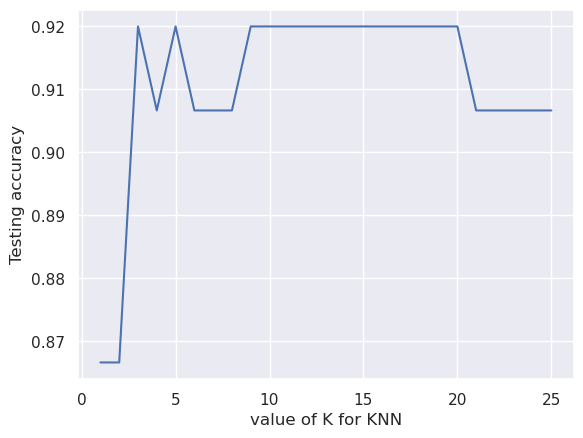

In [58]:
plt.plot(k_range, scores_list)
plt.xlabel('value of K for KNN')
plt.ylabel('Testing accuracy')

For the final model, we can choose the optimal value of K as 10 (which falls between 9 and 20.

In [59]:
knn = KNeighborsClassifier(n_neighbors = 10)


scores = cross_val_score(knn, x_train, y_train, cv=13)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.88 accuracy with a standard deviation of 0.06


In [60]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [61]:
y_pred = knn.predict(x_test)

In [62]:
confusion_matrix(y_test, y_pred)

array([[14,  2,  0],
       [ 1, 46,  1],
       [ 0,  2,  9]])

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [64]:
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Insomnia', 'None', 'Sleep Apnea']))


Accuracy: 0.9200

Micro Precision: 0.92
Micro Recall: 0.92
Micro F1-score: 0.92

Macro Precision: 0.92
Macro Recall: 0.88
Macro F1-score: 0.90

Weighted Precision: 0.92
Weighted Recall: 0.92
Weighted F1-score: 0.92

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.93      0.88      0.90        16
        None       0.92      0.96      0.94        48
 Sleep Apnea       0.90      0.82      0.86        11

    accuracy                           0.92        75
   macro avg       0.92      0.88      0.90        75
weighted avg       0.92      0.92      0.92        75



The accuracy and F1-score achieved using K-Nearest neighbours is 92%, which is slightly worse than when using Logistic Regression.

# Naive Bayes Classifier

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
gnb = GaussianNB()

scores = cross_val_score(gnb, x_train, y_train, cv=13)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.87 accuracy with a standard deviation of 0.09


In [67]:
gnb.fit(x_train, y_train)

GaussianNB()

In [68]:
y_pred = gnb.predict(x_test)

In [69]:
confusion_matrix(y_test, y_pred)

array([[14,  2,  0],
       [ 1, 45,  2],
       [ 0,  2,  9]])

In [70]:
print('\nAccuracy: {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Insomnia', 'None', 'Sleep Apnea']))


Accuracy: 0.9067

Micro Precision: 0.91
Micro Recall: 0.91
Micro F1-score: 0.91

Macro Precision: 0.89
Macro Recall: 0.88
Macro F1-score: 0.88

Weighted Precision: 0.91
Weighted Recall: 0.91
Weighted F1-score: 0.91

Classification Report

              precision    recall  f1-score   support

    Insomnia       0.93      0.88      0.90        16
        None       0.92      0.94      0.93        48
 Sleep Apnea       0.82      0.82      0.82        11

    accuracy                           0.91        75
   macro avg       0.89      0.88      0.88        75
weighted avg       0.91      0.91      0.91        75



The accuracy is 90.67% whereas the weighted F1-score is 91%. Therefore, this model performs slightly worse than the previous models.

# Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf = RandomForestClassifier(n_estimators=100)

scores = cross_val_score(rf, x_train, y_train, cv=13)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.89 accuracy with a standard deviation of 0.07


In [73]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [74]:
y_pred = rf.predict(x_test)

In [75]:
print('\nAccuracy: {:.3f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Insomnia', 'None', 'Sleep Apnea']))


Accuracy: 0.933

Micro Precision: 0.93
Micro Recall: 0.93
Micro F1-score: 0.93

Macro Precision: 0.94
Macro Recall: 0.89
Macro F1-score: 0.91

Weighted Precision: 0.94
Weighted Recall: 0.93
Weighted F1-score: 0.93

Classification Report

              precision    recall  f1-score   support

    Insomnia       1.00      0.88      0.93        16
        None       0.92      0.98      0.95        48
 Sleep Apnea       0.90      0.82      0.86        11

    accuracy                           0.93        75
   macro avg       0.94      0.89      0.91        75
weighted avg       0.94      0.93      0.93        75



The accuracy and the F1-score achieved is 93%. 

# SVM

In [76]:
from sklearn.svm import SVC

In [77]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

scores = cross_val_score(svm, x_train, y_train, cv=13)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.88 accuracy with a standard deviation of 0.06


In [78]:
svm.fit(x_train,y_train)

SVC(gamma=0.5)

In [79]:
y_pred = svm.predict(x_test)

In [80]:
print('\nAccuracy: {:.3f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Insomnia', 'None', 'Sleep Apnea']))


Accuracy: 0.933

Micro Precision: 0.93
Micro Recall: 0.93
Micro F1-score: 0.93

Macro Precision: 0.94
Macro Recall: 0.89
Macro F1-score: 0.91

Weighted Precision: 0.94
Weighted Recall: 0.93
Weighted F1-score: 0.93

Classification Report

              precision    recall  f1-score   support

    Insomnia       1.00      0.88      0.93        16
        None       0.92      0.98      0.95        48
 Sleep Apnea       0.90      0.82      0.86        11

    accuracy                           0.93        75
   macro avg       0.94      0.89      0.91        75
weighted avg       0.94      0.93      0.93        75



The accuracy and F1-score obtained is 93%

# Inference

After using K-fold cross validation, we can observe that Logistic Regression performs the best giving an accuracy of 91% with a standard deviation of 0.06. Since, the dataset has been balanced, the accuracy is almost to equal to F1-score for all the models.   